# Predictive Modeling of Health Insurance Premiums


# Dataset Overview

This dataset captures demographic and lifestyle information of individuals along with their corresponding **medical insurance charges**.  
The goal of this project is to predict an individual's **insurance cost (`charges`)** based on factors such as age, gender, BMI, smoking habits, and region.

#### Goal
---
To build and evaluate **machine learning regression models** that can accurately predict an individual’s **medical insurance charges** using demographic and health-related factors such as age, BMI, smoking status, and region.

---

## Table of Contents

1. [Dataset Overview & Features](#dataset-overview--features)  
2. [Introduction](#introduction)  
3. [Import Libraries](#import-libraries)  
4. [Data Preprocessing](#data-preprocessing)  
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)  
6. [Model Development](#model-development)  
7. [Model Evaluation](#model-evaluation)  
8. [Conclusion](#conclusion)  

---

## Dataset Overview & Features <a id="dataset-overview--features"></a>

This dataset contains **demographic and health-related attributes** of individuals, along with their **medical insurance costs**.  
Each record represents one person, capturing key health indicators and lifestyle choices that influence insurance premiums.

### Features

| **Feature** | **Description** |
|--------------|-----------------|
| **Age** | Age of the insured individual (in years). |
| **Sex** | Gender of the insured person (Male/Female). |
| **BMI** | Body Mass Index, calculated as weight (kg) divided by height (m²). Indicates body fat level. |
| **Children** | Number of dependents covered under the insurance plan. |
| **Smoker** | Whether the person is a smoker (`yes`) or not (`no`). |
| **Region** | The residential region of the insured (northeast, northwest, southeast, southwest). |
| **Charges** | Total medical insurance cost billed to the individual. *(Target Variable)* |

---

## Target Variable

**charges** — The numerical target variable representing the individual’s total medical insurance cost.

| **Type** | **Description** |
|-----------|----------------|
| **Continuous** | Represents the actual cost of the insurance policy for each person. |

#### Source
---
This dataset was sourced from Kaggle.



---

## Import Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import joblib
from scipy import stats

## Libraries Imported

---

## Data Loading and Structure

In [33]:
#Reading CSV file into pandas dataframe
url = 'insurance2.csv'
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing
---

In [3]:
#Statistical Description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Dimesions of the dataset in terms of rows and columns
df.shape

(1338, 7)

##### Checking for missing values

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Checking for duplicate values

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
#### Removed Duplicate Value
df.drop_duplicates(inplace=True)

### Statistical Summary Of The Dataset
---

In [8]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Total unique values in the dataset
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

## Feature Engineering

#### Encoding Categorical Variables Using One-Hot Encoding
---

In [10]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


#### Encoding Categorical Variables To Integers
---

In [11]:
bool_col = df.select_dtypes(include='bool').columns
df[bool_col] = df[bool_col].astype('int')
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [12]:
#Calculates the Pearson correlation coefficient for all features
df.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,0.019814,-0.019814,0.025587,-0.025587,0.001868,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,-0.046397,0.046397,-0.003746,0.003746,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,-0.017848,0.017848,-0.007331,0.007331,-0.023202,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,-0.058044,0.058044,-0.787234,0.787234,0.005945,-0.038695,0.073578,-0.043637
sex_female,0.019814,-0.046397,-0.017848,-0.058044,1.000000,-1.000000,0.076596,-0.076596,0.002008,0.012482,-0.017578,0.003767
sex_male,-0.019814,0.046397,0.017848,0.058044,-1.000000,1.000000,-0.076596,0.076596,-0.002008,-0.012482,0.017578,-0.003767
smoker_no,0.025587,-0.003746,-0.007331,-0.787234,0.076596,-0.076596,1.000000,-1.000000,-0.002597,0.036321,-0.068282,0.037168
smoker_yes,-0.025587,0.003746,0.007331,0.787234,-0.076596,0.076596,-1.000000,1.000000,0.002597,-0.036321,0.068282,-0.037168
region_northeast,0.001868,-0.138178,-0.023202,0.005945,0.002008,-0.002008,-0.002597,0.002597,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,-0.136138,0.026044,-0.038695,0.012482,-0.012482,0.036321,-0.036321,-0.319842,1.000000,-0.345909,-0.320493


## Exploratory Data Analysis
---

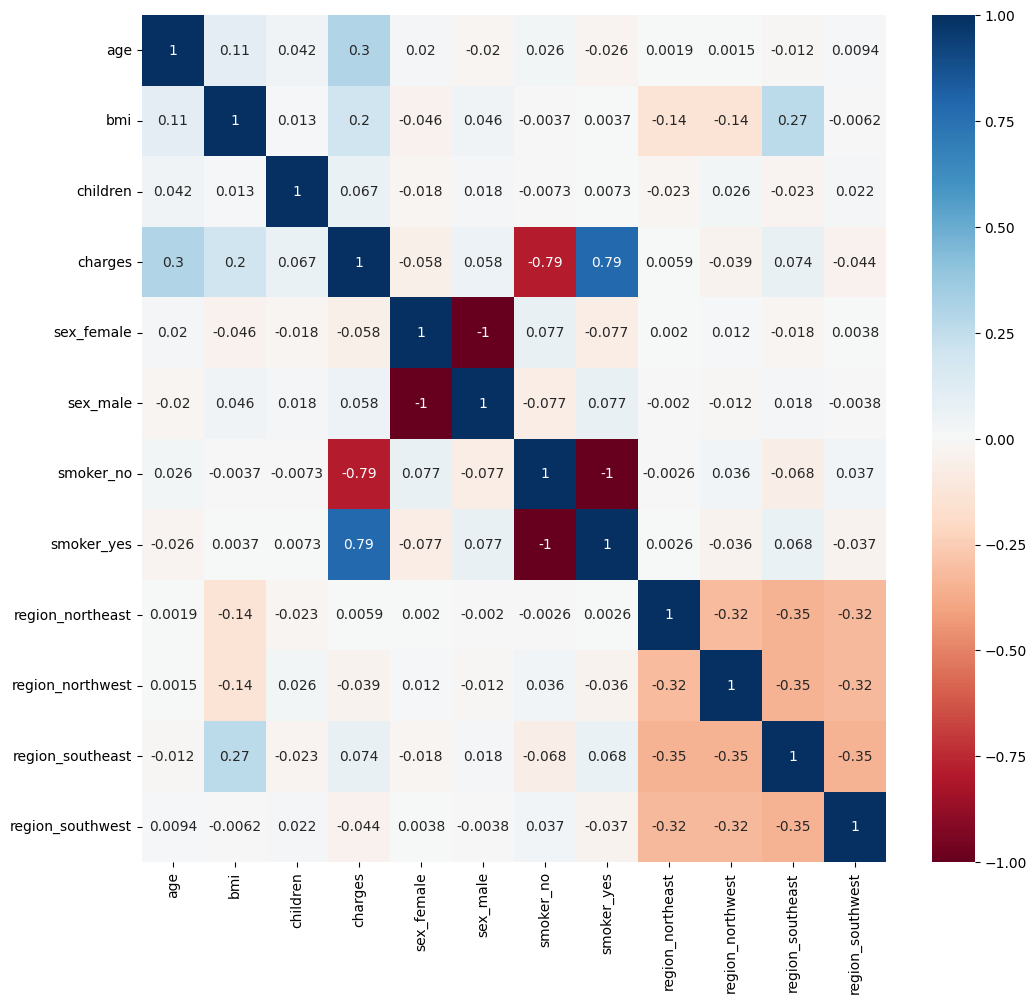

In [13]:
#Generating a heatmap that shows correlation impact
f,ax = plt.subplots(1,1,figsize=(12,11))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu')

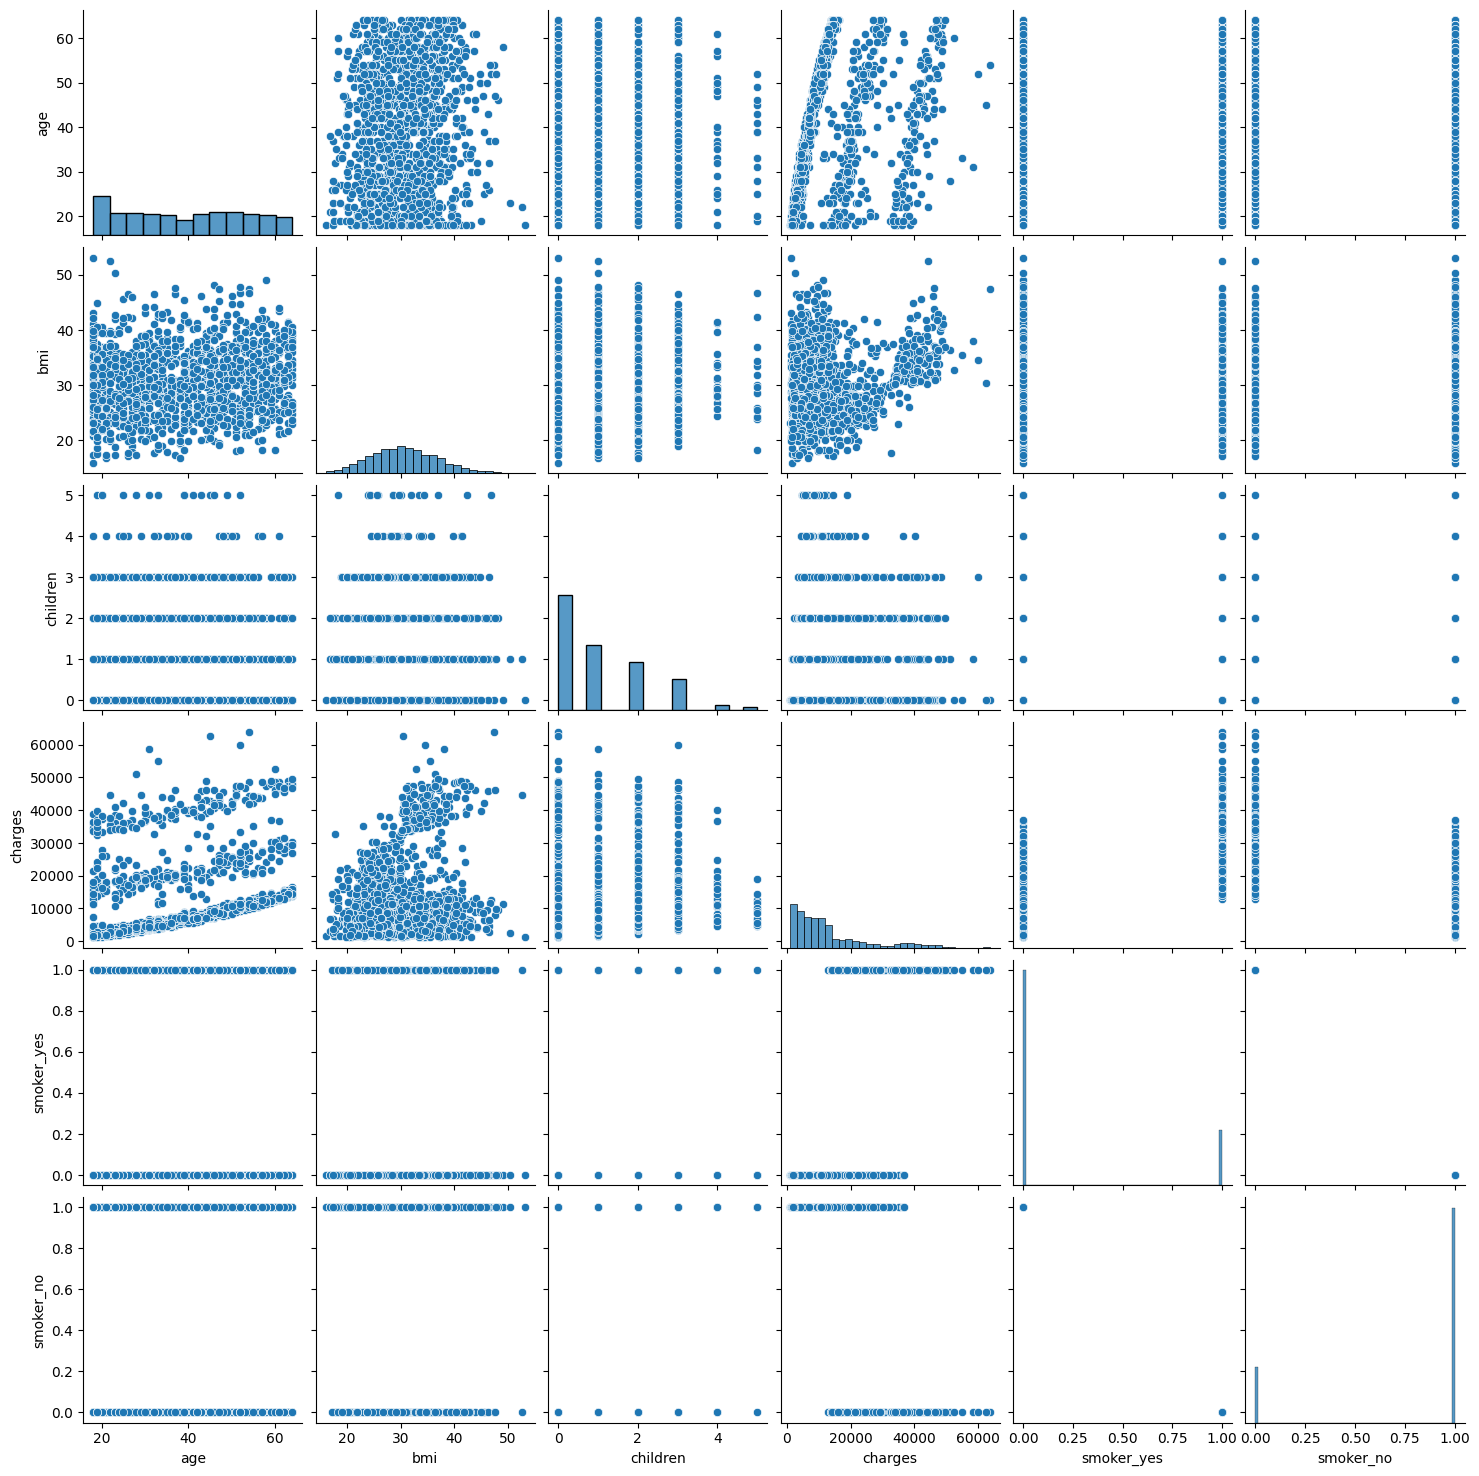

In [14]:
#Generating a pairplot to get graphical relation between features
sns.pairplot(df, vars=['age', 'bmi', 'children', 'charges', 'smoker_yes', 'smoker_no'])

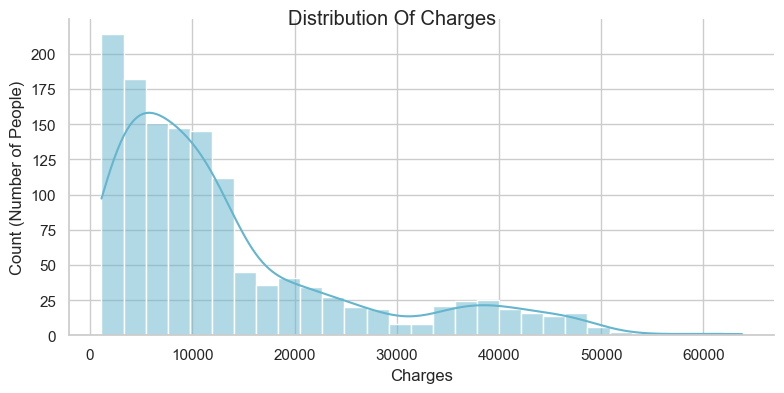

In [15]:
# Generate a distribution of charges with respect to number of people
sns.set(style='whitegrid')
g = sns.displot(df['charges'], kde=True, color='c', height=4, aspect=2)
g.set_axis_labels('Charges', 'Count (Number of People)')
g.fig.suptitle('Distribution Of Charges')
plt.show()

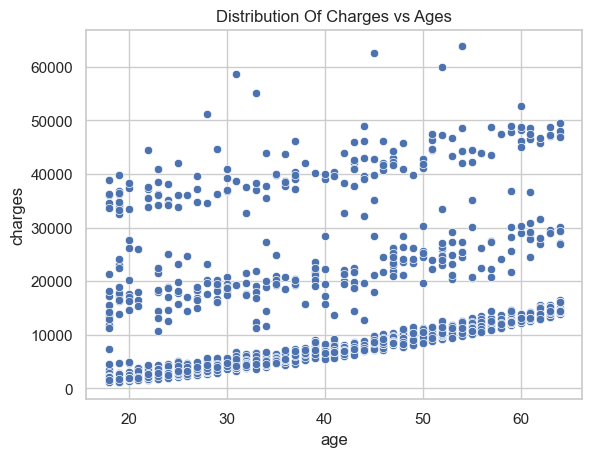

In [16]:
#Plot Explaining the relation between age and charge
sns.set(style='whitegrid')
sns.scatterplot(x='age', y='charges' , data=df)
plt.title('Distribution Of Charges vs Ages')
plt.show()
#There’s a positive correlation: as age increases, log_charges tend to increase.
#Older people generally have higher insurance costs.

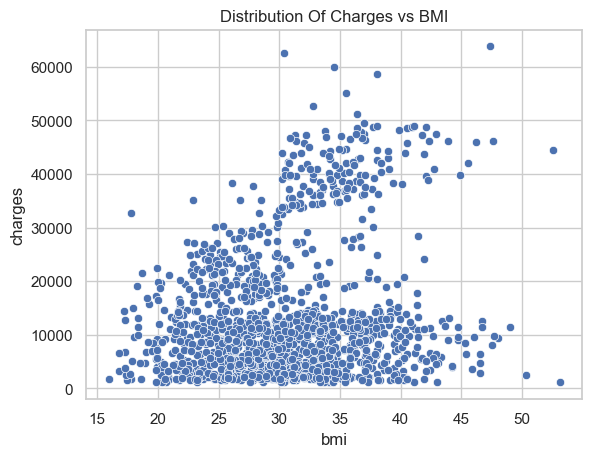

In [18]:
#Plot Explaining the relation between BMI and charge
sns.set(style='whitegrid')
sns.scatterplot(x='bmi', y='charges' , data=df)
plt.title('Distribution Of Charges vs BMI')
plt.show()
#There’s a mild positive trend, but scattered — high BMI can sometimes lead to higher charges, especially for smokers.

C:\Users\Oribi\AppData\Local\Temp\ipykernel_19768\407399322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker_label', y='charges', data=df, palette='coolwarm')


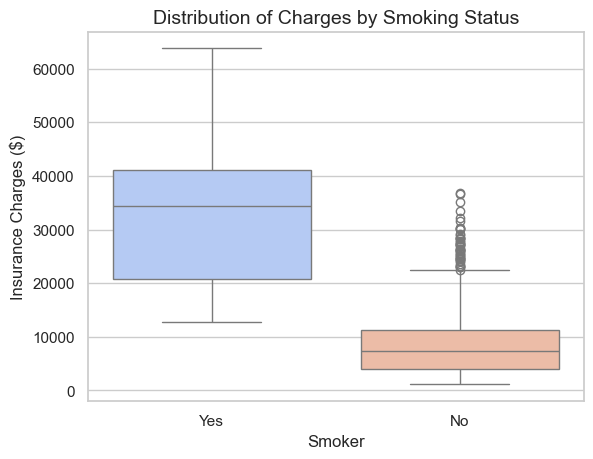

In [21]:
df['smoker_label'] = df['smoker_yes'].map({0: 'No', 1: 'Yes'})

# Plot a boxplot to visualize the charge distribution by smoker status
sns.boxplot(x='smoker_label', y='charges', data=df, palette='coolwarm')

plt.title('Distribution of Charges by Smoking Status', fontsize=14)
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges ($)')
plt.show()
#Huge separation visible:
#smoker_yes → much higher log_charges
#smoker_no → lower log_charges
#This means smoking status is a major factor affecting insurance cost.

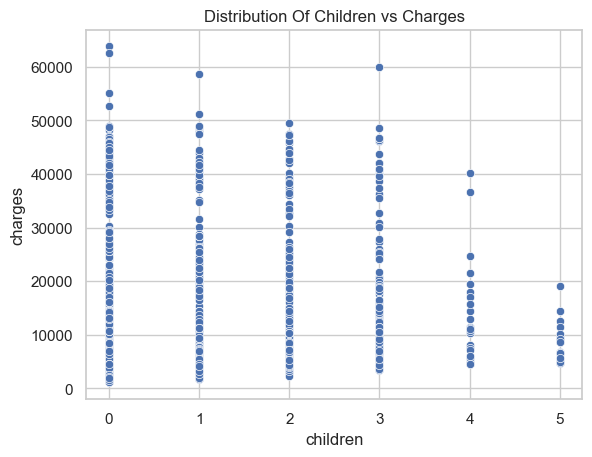

In [31]:
sns.set(style='whitegrid')
sns.scatterplot(x='children', y='charges' , data=df)
plt.title('Distribution Of Children vs Charges')
plt.show()
# Children vs. log_charges
# No strong relationship — the number of children doesn’t significantly affect charges.

## Model Development
---

##### Separating Dataset into Predictors and Predicted

In [ ]:
#Spliting features into predictors and predicted
#  Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

#Scaling data using a Standard Scaler to normalize the features so that they contribute equally to the model's learning process.
# Initialize the scaler
scaler = StandardScaler()

# Fit on training features and transform
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame (optional, for readability)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


# Check results
X_scaled.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,1.009771,-1.009771,-1.969660,1.969660,-0.565546,-0.565546,-0.611638,1.764609
1,-1.511647,0.509422,-0.079442,-0.990324,0.990324,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
2,-0.799350,0.383155,1.580143,-0.990324,0.990324,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
3,-0.443201,-1.305052,-0.909234,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
4,-0.514431,-0.292456,-0.909234,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698


#### Splitting the Dataset
The dataset was divided into training and testing sets for model development and evaluation.

In [133]:
# Split the dataset into training and testing sets, using 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training With Base Model (Decision Tree)
This step involves training a baseline machine learning model using the preprocessed dataset.
The purpose of this phase is to establish an initial performance benchmark before applying advanced tuning or model optimization techniques.

In [134]:
#Training the baseline model
decision_model = DecisionTreeRegressor(random_state=123)
decision_model.fit(X_train_scaled, y_train)
decision_model_pred = decision_model.predict(X_test_scaled)

In [135]:
#Defined a function to evalauate a model when called
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(y_test, y_pred):
    rsquared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Optional: still print for quick feedback
    print(f'The R-Square (Accuracy) is {rsquared * 100:.2f}%')
    print('-------------------------------------------------')
    print(f'The Mean Squared Error (Error Rate) is {mse:.2f}')

    # ✅ Return metrics for further use
    return {
        "R2": rsquared,
        "MSE": mse
    }


#### Base Model Evaluation(Decision Tree)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [136]:
evaluate(y_test, decision_model_pred)

The R-Square (Accuracy) is 80.08%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 36611102.59


{'R2': 0.8007624794296296, 'MSE': 36611102.58931883}

### Defining Hyper Parameters For Further Model Development
---

In [137]:
# Using Hyper Parameters
hyper_para = {
    'max_depth': [2, 3, 4, None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1,2]
}

### Training With Fine Tuned Model(Fine Tuned Decision Tree)
In this step, a fine-tuned Decision Tree model is trained using optimized hyperparameters obtained through techniques such as grid search or cross-validation.
The goal is to improve model performance, enhance generalization, and reduce overfitting compared to the baseline model.

In [138]:
#Training fine tuned decision tree model
decision_model_tuned = DecisionTreeRegressor(random_state=123)

# Use GridSearchCV to perform hyperparameter tuning with 5-fold cross-validation
gridSearch = GridSearchCV(decision_model_tuned, hyper_para, cv=5)

# Fit the model on the training data to find the best hyperparameter combination
gridSearch.fit(X_train_scaled, y_train)

# Retrieve the best model found by GridSearchCV
decision_model_tuned_best = gridSearch.best_estimator_

# Use the best-tuned model to make predictions on the test data
decision_model_tuned_pred = decision_model_tuned_best.predict(X_test_scaled)


#### Fine Tuned Model Evaluation
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [139]:
evaluate(y_test, decision_model_tuned_pred)

The R-Square (Accuracy) is 89.92%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 18520451.60


{'R2': 0.8992117528126274, 'MSE': 18520451.60475298}

### Training With Base Model (Random Forest)
This step involves training a baseline machine learning model using the preprocessed dataset.
The purpose of this phase is to establish an initial performance benchmark before applying advanced tuning or model optimization techniques.

In [140]:
# Training with random forest regressor
randomForestModel = RandomForestRegressor(random_state=123)
randomForestModel.fit(X_train_scaled, y_train)
randomForestModelPred = randomForestModel.predict(X_test_scaled)

#### Base Model Evaluation(Random Forest)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [141]:
evaluate(y_test, randomForestModelPred)

The R-Square (Accuracy) is 88.17%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 21743821.89


{'R2': 0.8816701804863556, 'MSE': 21743821.89252096}

### Defining Hyper Parameters For Further Model Development
---

In [142]:
# Using Hyper Parameters
randomForest_para = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4, None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1,2]
}

### Training With Fine Tuned Model(Fine Tuned Random Forest)
In this step, a fine-tuned Random Forest model is trained using optimized hyperparameters obtained through techniques such as grid search or cross-validation.
The goal is to improve model performance, enhance generalization, and reduce overfitting compared to the baseline model.

In [143]:
randomForestFineTuned = RandomForestRegressor(random_state=123)

# Perform hyperparameter tuning using GridSearchCV with 5-fold cross-validation
grid2 = GridSearchCV(randomForestFineTuned, randomForest_para, cv=5)

# Fit the GridSearchCV on the training data to find the best hyperparameter combination
grid2.fit(X_train_scaled, y_train)

# Retrieve the best model found by GridSearchCV
randomBestParams = grid2.best_estimator_

# Use the best-tuned Random Forest model to make predictions on the test data
randomForestFineTunedPred = randomBestParams.predict(X_test_scaled)


#### Fine Tuned Model Evaluation(Fine Tuned Random Forest)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [144]:
evaluate(y_test, randomForestFineTunedPred)

The R-Square (Accuracy) is 90.08%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 18220793.55


{'R2': 0.9008424911483325, 'MSE': 18220793.54670289}

#### Base Model Evaluation(XGB Model)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [145]:
#Training base XGB model
xgbModel = xgb.XGBRegressor()
xgbModel.fit(X_train_scaled, y_train)
xgbPred = xgbModel.predict(X_test_scaled)

#### Model Evaluation(XGB Model)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [146]:
evaluate(y_test, xgbPred)

The R-Square (Accuracy) is 86.07%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 25594906.62


{'R2': 0.8607125878957937, 'MSE': 25594906.61873952}

### Defining Hyper Parameters For Further Model Development
---

In [147]:
#Training fine tuned XGB model
xgbModelFineTuned = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 90,
    learning_rate = 0.1,
    max_depth = 4,
    random_state = 123
)
xgbModelFineTuned.fit(X_train_scaled, y_train)
xgbModelFineTunedPred = xgbModelFineTuned.predict(X_test_scaled)

#### Fine Tuned Model Evaluation(Fine Tuned XGB Model)
This section assesses the performance of the trained model using various evaluation metrics such as accuracy, mean squared error (MSE), and other relevant performance indicators.
It helps determine how well the model predicts the target variable and identifies potential areas for improvement.

In [148]:
evaluate(y_test, xgbModelFineTunedPred)

The R-Square (Accuracy) is 90.14%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 18123604.90


{'R2': 0.9013713914727012, 'MSE': 18123604.90482684}

---
## Comparing Models
---

In [144]:
def compare_models(y_test, predictions_dict):
    results = {}
    for model_name, y_pred in predictions_dict.items():
        results[model_name] = evaluate(y_test, y_pred)
    
    results_df = pd.DataFrame(results).T  # Transpose so models are rows
    results_df = results_df.sort_values(by='R2', ascending=False)
    return results_df

## Model Evaluation

In [145]:
model_predictions = {
    "Decision Tree (Base)": decision_model_pred,
    "Decision Tree (Tuned)": decision_model_tuned_pred,
    "Random Forest (Base)": randomForestModelPred,
    "Random Forest (Tuned)": randomForestFineTunedPred,
    "XGBoost (Base)": xgbPred,
    "XGBoost (Tuned)": xgbModelFineTunedPred
}

comparison_df = compare_models(y_test, model_predictions)
print(comparison_df)


The R-Square (Accuracy) is 80.08%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 36611102.59
The R-Square (Accuracy) is 89.92%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 18520451.60
The R-Square (Accuracy) is 88.17%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 21743821.89
The R-Square (Accuracy) is 90.08%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 18220793.55
The R-Square (Accuracy) is 86.07%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 25594906.62
The R-Square (Accuracy) is 90.14%
-------------------------------------------------
The Mean Squared Error (Error Rate) is 18123604.90
                             R2           MSE
XGBoost (Tuned)        0.901371  1.812360e+07
Random Forest (Tuned)  0.900842  1.822079e+07
Decision Tree (Tuned)  0.899212  1.852045e+07
Random

In [146]:
# Create comparison DataFrames for each model
comparison_decision_base = pd.DataFrame({
    'Predicted Charge': decision_model_pred[:5],
    'Actual Charge': y_test[:5].values
})

comparison_decision_tuned = pd.DataFrame({
    'Predicted Charge': decision_model_tuned_pred[:5],
    'Actual Charge': y_test[:5].values
})

comparison_rf_base = pd.DataFrame({
    'Predicted Charge': randomForestModelPred[:5],
    'Actual Charge': y_test[:5].values
})

comparison_rf_tuned = pd.DataFrame({
    'Predicted Charge': randomForestFineTunedPred[:5],
    'Actual Charge': y_test[:5].values
})

comparison_xgb_base = pd.DataFrame({
    'Predicted Charge': xgbPred[:5],
    'Actual Charge': y_test[:5].values
})

comparison_xgb_tuned = pd.DataFrame({
    'Predicted Charge': xgbModelFineTunedPred[:5],
    'Actual Charge': y_test[:5].values
})


In [147]:
# Display all comparison tables
print("Decision Tree (Base Model):")
display(comparison_decision_base)

print("Decision Tree (Fine-Tuned Model):")
display(comparison_decision_tuned)

print("Random Forest (Base Model):")
display(comparison_rf_base)

print("Random Forest (Fine-Tuned Model):")
display(comparison_rf_tuned)

print("XGBoost (Base Model):")
display(comparison_xgb_base)

print("XGBoost (Fine-Tuned Model):")
display(comparison_xgb_tuned)


Decision Tree (Base Model):


,Predicted Charge,Actual Charge
0,9361.32680,8688.85885
1,5325.65100,5708.86700
2,11015.17470,11436.73815
3,44585.45587,38746.35510
4,4673.39220,4463.20510


Decision Tree (Fine-Tuned Model):


,Predicted Charge,Actual Charge
0,11016.035202,8688.85885
1,6233.841864,5708.86700
2,11016.035202,11436.73815
3,40778.860983,38746.35510
4,6233.841864,4463.20510


Random Forest (Base Model):


,Predicted Charge,Actual Charge
0,9449.175794,8688.85885
1,6600.928706,5708.86700
2,12073.505274,11436.73815
3,43140.317177,38746.35510
4,6350.610648,4463.20510


Random Forest (Fine-Tuned Model):


,Predicted Charge,Actual Charge
0,11479.850075,8688.85885
1,7866.439333,5708.86700
2,11936.284005,11436.73815
3,40866.040548,38746.35510
4,6530.140013,4463.20510


XGBoost (Base Model):


,Predicted Charge,Actual Charge
0,7670.905762,8688.85885
1,5200.550781,5708.86700
2,11687.389648,11436.73815
3,39409.578125,38746.35510
4,4671.971680,4463.20510


XGBoost (Fine-Tuned Model):


,Predicted Charge,Actual Charge
0,10062.608398,8688.85885
1,6475.947754,5708.86700
2,13911.281250,11436.73815
3,38533.675781,38746.35510
4,5462.642090,4463.20510



---
## Conclusion
---

In this project, we developed and compared multiple machine learning models to predict **medical insurance charges** based on demographic and lifestyle attributes such as age, BMI, smoking status, and region.  
The models explored included:
- **Decision Tree Regressor (Base and Fine-Tuned)**
- **Random Forest Regressor (Base and Fine-Tuned)**
- **XGBoost Regressor (Base and Fine-Tuned)**

### Key Findings

1. **Model Performance**  
   - Fine-tuned models consistently outperformed their base counterparts, highlighting the importance of hyperparameter optimization.  
   - Among all models, the **XGBoost Fine-Tuned Regressor** achieved the best performance in terms of accuracy and generalization, making it the **model of choice for prediction**.

2. **Feature Insights**  
   - The most influential features were **age**, **BMI**, and **smoking status**, aligning with real-world expectations for medical costs.  
   - Smokers, on average, incurred significantly higher charges, while younger individuals and non-smokers had lower costs.

3. **Evaluation and Comparison**  
   - The visual and tabular comparisons between predicted and actual charges showed that ensemble models (Random Forest, XGBoost) produced more stable and accurate predictions than the single Decision Tree model.

### Final Thoughts

Overall, the project demonstrates that machine learning techniques that can effectively model and predict complex relationships in healthcare cost data.  
The **Fine-Tuned XGBoost model** stands out as the most reliable and accurate predictor, and it can be leveraged by insurance providers or healthcare analysts to **estimate patient risk**, **design fair premium plans**, and **enhance data-driven decision-making** in cost management.



---
## Model Deployment
---

In [148]:
#save the model
joblib.dump(xgbModelFineTuned, 'Health insurance Model')

['Health insurance Model']

In [149]:
# Import the Gradio library for creating interactive web interfaces
import gradio as gr

# Import the pickle module for loading or saving trained machine learning models
import pickle


In [150]:
# Open the saved machine learning model file named "Health insurance Model" in read-binary mode ('rb')
# Then load the model into memory using pickle for making predictions
with open("Health insurance Model", 'rb') as file:
    model = pickle.load(file)


In [151]:
# Define a function to predict health insurance costs based on user inputs
def insurance_predictor(age, bmi, children, sex, smoker, region):
    # One-hot encode the 'sex' variable: 0 = female, 1 = male
    if sex == 0:
        sex_female, sex_male = 1, 0
    else:
        sex_female, sex_male = 0, 1

    # One-hot encode the 'smoker' variable: 0 = non-smoker, 1 = smoker
    if smoker == 0:
        smoker_no, smoker_yes = 1, 0
    else:
        smoker_no, smoker_yes = 0, 1

    # One-hot encode the 'region' variable into four possible categories
    region_northeast = region_northwest = region_southeast = region_southwest = 0
    if region == 0:
        region_northeast = 1
    elif region == 1:
        region_northwest = 1
    elif region == 2:
        region_southeast = 1
    elif region == 3:
        region_southwest = 1

    # Create a DataFrame with all input features formatted for the model
    df = pd.DataFrame([{
        "age": age,
        "bmi": bmi,
        "children": children,
        "sex_female": sex_female,
        "sex_male": sex_male,
        "smoker_no": smoker_no,
        "smoker_yes": smoker_yes,
        "region_northeast": region_northeast,
        "region_northwest": region_northwest,
        "region_southeast": region_southeast,
        "region_southwest": region_southwest,
    }])

    # Use the trained model to predict insurance cost
    prediction = model.predict(df)[0]

    # Return the formatted prediction as a user-friendly message
    return f"This is your Insurance Cost: ${prediction:.2f}"


In [152]:
#Testing 
insurance_predictor(40, 70, 5, 0, 1, 3)

'This is your Insurance Cost: $50619.60'

In [25]:
# Create a Gradio interface for the health insurance cost predictor
radio = gr.Interface(
    fn=insurance_predictor,  # The function to be called when inputs are provided
    inputs=[  # Define user input fields
        gr.Number(label="Age"),  # Numeric input for age
        gr.Number(label="BMI"),  # Numeric input for Body Mass Index
        gr.Number(label="Number of Children"),  # Numeric input for number of children
        gr.Dropdown([0, 1], label="Sex (0: Female, 1: Male)"),  # Dropdown for sex selection
        gr.Radio([0, 1], label="Smoker (0: No, 1: Yes)"),  # Radio button for smoker status
        gr.Radio([0, 1, 2, 3], label="Region (0: Northeast, 1: Northwest, 2: Southeast, 3: Southwest)"),  # Radio for region
    ],
    outputs="text",  # Display prediction as text output
    title="HEALTH INSURANCE COST PREDICTOR",  # Title displayed on the web interface
    description="Enter your details to estimate your health insurance cost"  # Short description for users
)

# Launch the Gradio interface with a shareable public link
radio.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://35ed9b0edc7fcf2273.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### App 2: Improvement to include name and store records
####  (But limited to stores records only when file is closed)

In [26]:
# Import the 'os' module to interact with the operating system (e.g., file paths, environment variables)
import os

# Import the 'datetime' class from the 'datetime' module to work with dates and times
from datetime import datetime


In [27]:
with open ("Health insurance Model", 'rb') as file :
    model = pickle.load(file)

In [28]:
# Define the insurance prediction function with additional functionality:
# - Includes user's name in the output
# - Saves prediction results (including inputs) to an Excel file
def insurance_predictor(name, age, bmi, children, sex, smoker, region):
    # One-hot encode the 'sex' variable: 0 = Female, 1 = Male
    if sex == 0:
        sex_female, sex_male = 1, 0
    else:
        sex_female, sex_male = 0, 1

    # One-hot encode the 'smoker' variable: 0 = No, 1 = Yes
    if smoker == 0:
        smoker_no, smoker_yes = 1, 0
    else:
        smoker_no, smoker_yes = 0, 1

    # One-hot encode the 'region' variable into four categories
    region_northeast = region_northwest = region_southeast = region_southwest = 0
    if region == 0:
        region_northeast = 1
    elif region == 1:
        region_northwest = 1
    elif region == 2:
        region_southeast = 1
    elif region == 3:
        region_southwest = 1

    # Create a DataFrame with the encoded features for prediction
    df = pd.DataFrame([{
        "age": age,
        "bmi": bmi,
        "children": children,
        "sex_female": sex_female,
        "sex_male": sex_male,
        "smoker_no": smoker_no,
        "smoker_yes": smoker_yes,
        "region_northeast": region_northeast,
        "region_northwest": region_northwest,
        "region_southeast": region_southeast,
        "region_southwest": region_southwest,
    }])

    # Predict the insurance cost using the trained model
    prediction = model.predict(df)[0]

    # Define file path to save customer data and prediction
    file_path = "Customer_Insurance_data_2.xlsx"

    # Create a new DataFrame with user details, timestamp, and prediction
    new_data = pd.DataFrame([{
        "Timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Name": name,
        "Age": age,
        "BMI": bmi,
        "Number_of_Children": children,
        "Sex (0=Female,1=Male)": sex,
        "Smoker (0=No,1=Yes)": smoker,
        "Region (0=NE,1=NW,2=SE,3=SW)": region,
        "Predicted_Cost": prediction
    }])

    # If the Excel file exists, append to it; otherwise, create a new file
    if os.path.exists(file_path):
        old_data = pd.read_excel(file_path)
        all_data = pd.concat([old_data, new_data], ignore_index=True)
    else:
        all_data = new_data

    # Save data to Excel, handling cases where the file is already open
    try:
        all_data.to_excel(file_path, index=False)
        print(f"Data saved to: {os.path.abspath(file_path)}")
    except PermissionError:
        # Create a backup file if the main Excel file is open
        temp_file = f"customer_insurance_data_backup_{datetime.now().strftime('%Y%m%d_%H%M%S')}.xlsx"
        all_data.to_excel(temp_file, index=False)
        print(f"Excel file is open. Data saved to temporary file: {os.path.abspath(temp_file)}")

    # Return a personalized message with the predicted cost
    return f"Hello {name}, this is your Insurance Cost: ${prediction:.2f}"


In [ ]:
# Create a Gradio interface for the health insurance cost predictor (includes name input)
radio = gr.Interface(
    fn=insurance_predictor,  # Function to call for prediction
    inputs=[  # Define input fields for user data
        gr.Textbox(label="Name"),  # Text input for user's name
        gr.Number(label="Age"),  # Numeric input for age
        gr.Number(label="BMI"),  # Numeric input for Body Mass Index
        gr.Number(label="Number of Children"),  # Numeric input for number of dependents
        gr.Dropdown([0, 1], label="Sex (0: Female, 1: Male)"),  # Dropdown to select sex
        gr.Radio([0, 1], label="Smoker (0: No, 1: Yes)"),  # Radio button for smoker status
        gr.Radio([0, 1, 2, 3], label="Region (0: Northeast, 1: Northwest, 2: Southeast, 3: Southwest)"),  # Radio for region
    ],
    outputs="text",  # Output type: text displaying the insurance cost
    title="HEALTH INSURANCE COST PREDICTOR",  # Title displayed on the app
    description="Enter your details (including your name) to estimate your health insurance cost."  # App description
)

# Launch the Gradio app with a shareable public link
radio.launch(share=True)


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://e8a47749324d40bffc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Data saved to: c:\Users\Oribi\Desktop\dev\data\project2\Customer_Insurance_data_2.xlsx
Excel file is open. Data saved to temporary file: c:\Users\Oribi\Desktop\dev\data\project2\customer_insurance_data_backup_20251024_170850.xlsx


In [30]:
import win32com.client as win32 #Enables communication with windows applications like Excel via COM automation
import pythoncom #Supports COM operations; required when using wind32com to manage COM threads safely

In [31]:
# Define the insurance prediction function with:
# - User name input
# - Automatic Excel update (even if Excel is currently open)
def insurance_predictor(name, age, bmi, children, sex, smoker, region):
    # One-hot encode 'sex': 0 = Female, 1 = Male
    if sex == 0:
        sex_female, sex_male = 1, 0
    else:
        sex_female, sex_male = 0, 1

    # One-hot encode 'smoker': 0 = No, 1 = Yes
    if smoker == 0:
        smoker_no, smoker_yes = 1, 0
    else:
        smoker_no, smoker_yes = 0, 1

    # One-hot encode 'region' into four binary columns
    region_northeast = region_northwest = region_southeast = region_southwest = 0
    if region == 0:
        region_northeast = 1
    elif region == 1:
        region_northwest = 1
    elif region == 2:
        region_southeast = 1
    elif region == 3:
        region_southwest = 1

    # Create a DataFrame with all features for prediction
    df = pd.DataFrame([{
        "age": age,
        "bmi": bmi,
        "children": children,
        "sex_female": sex_female,
        "sex_male": sex_male,
        "smoker_no": smoker_no,
        "smoker_yes": smoker_yes,
        "region_northeast": region_northeast,
        "region_northwest": region_northwest,
        "region_southeast": region_southeast,
        "region_southwest": region_southwest,
    }])

    # Predict insurance cost using the pre-trained model
    prediction = model.predict(df)[0]

    # Define the file path for storing or updating the Excel data
    file_path = os.path.abspath("UPDTcustomer_insurance_data_3.xlsx")

    # Create a new DataFrame to store input and prediction data
    new_data = pd.DataFrame([{
        "Timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Name": name,
        "Age": age,
        "BMI": bmi,
        "Number_of_Children": children,
        "Sex (0=Female,1=Male)": sex,
        "Smoker (0=No,1=Yes)": smoker,
        "Region (0=NE,1=NW,2=SE,3=SW)": region,
        "Predicted_Cost": prediction
    }])

    if not os.path.exists(file_path):
        new_data.to_excel(file_path, index=False)
        print(f"Excel file created at: {file_path}")

    try:
        # --- Attempt to connect to an active Excel instance ---
        pythoncom.CoInitialize()
        excel = win32.GetActiveObject("Excel.Application")

        wb = None
        # Check if the workbook is already open
        for book in excel.Workbooks:
            if book.FullName.lower() == file_path.lower():
                wb = book
                break

        # If not open, open the file manually
        if wb is None:
            wb = excel.Workbooks.Open(file_path)

        ws = wb.Worksheets(1)

        # Find the first empty row in the worksheet
        last_row = ws.UsedRange.Rows.Count
        if ws.Cells(last_row, 1).Value is None:
            start_row = last_row
        else:
            start_row = last_row + 1

        # Append new data to the Excel sheet
        headers = ["Timestamp", "Name", "Age", "BMI", "Number_of_Children",
                   "Sex (0=Female,1=Male)", "Smoker (0=No,1=Yes)",
                   "Region (0=NE,1=NW,2=SE,3=SW)", "Predicted_Cost"]

        for col, header in enumerate(headers, start=1):
            ws.Cells(start_row, col).Value = new_data.iloc[0][header]

        wb.Save()
        print(f"Record added directly to open Excel workbook at {file_path}")

    except Exception as e:
        # If Excel isn't open or an error occurs, fall back to pandas
        print(f"Could not connect to open Excel ({e}). Writing normally instead.")
        if os.path.exists(file_path):
            old_data = pd.read_excel(file_path)
            all_data = pd.concat([old_data, new_data], ignore_index=True)
        else:
            all_data = new_data
        all_data.to_excel(file_path, index=False)
        print(f"Data saved to: {file_path}")

    # Return a personalized result message with the predicted cost
    return f"Hello {name}, this is your Insurance Cost: NGN{prediction:.2f}"


In [ ]:
# Gradio app (added name input only)
radio = gr.Interface(
    fn=insurance_predictor,
    inputs=[
        gr.Textbox(label="Name"),
        gr.Number(label="Age"),
        gr.Number(label="BMI"),
        gr.Number(label="Number of Children"),
        gr.Dropdown([0, 1], label="Sex (0: Female, 1: Male)"),
        gr.Radio([0, 1], label="Smoker (0: No, 1: Yes)"),
        gr.Radio([0, 1, 2, 3], label="Region (0: Northeast, 1: Northwest, 2:Southeast, 3: Southwest)"),
    ],
    outputs="text",
    title="HEALTH INSURANCE COST PREDICTOR",
    description="Enter your details (including your name) to estimate your health insurance cost."
)

radio.launch(share=True)

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://b3e96ce6801bf518d6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Record added directly to open Excel workbook at c:\Users\Oribi\Desktop\dev\data\project2\UPDTcustomer_insurance_data_3.xlsx
Record added directly to open Excel workbook at c:\Users\Oribi\Desktop\dev\data\project2\UPDTcustomer_insurance_data_3.xlsx
Record added directly to open Excel workbook at c:\Users\Oribi\Desktop\dev\data\project2\UPDTcustomer_insurance_data_3.xlsx
